In [1]:
import pandas as pd
import seaborn as sns
import neattext.functions as nfx
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import joblib

In [2]:
df_train = pd.read_csv('train_150k.txt', sep='\t', names=['sent', 'tweet'])
df_test = pd.read_csv('test_62k.txt', sep='\t', names=['sent', 'tweet'])

print("Training Dataset\n", df_train.head())
print("\nTesting Dataset\n", df_test.head())
print("\nSent total count\n", df_train['sent'].value_counts())

Training Dataset
    sent                                              tweet
0     0  Starting  back at work today   Looks like it'l...
1     1  Sugar levels dropping... munchies setting in. ...
2     1     @karineb22 yeah!!! have a great summer break! 
3     1  hannah montana was very good.  now going to re...
4     1  @Mayra326 aww, have fun!  I just had my 3D las...

Testing Dataset
    sent                                              tweet
0     1  @justineville ...yeahhh. ) i'm 39 tweets from ...
1     0  @ApplesnFeathers aww. Poor baby! On your only ...
2     0  @joeymcintyre With my refunded $225 (Australia...
3     0  It's fine. Today sucks just because me those t...
4     0  Im just chilling on psp and stuff, but sitting...

Sent total count
 0    75019
1    74966
Name: sent, dtype: int64


In [3]:
# Remove user handles
df_train['Clean_Tweet'] = df_train['tweet'].apply(nfx.remove_userhandles)
df_test['Clean_Tweet'] = df_test['tweet'].apply(nfx.remove_userhandles)

# Remove stopwords
df_train['Clean_Tweet'] = df_train['Clean_Tweet'].apply(nfx.remove_stopwords)
df_test['Clean_Tweet'] = df_test['Clean_Tweet'].apply(nfx.remove_stopwords)

print(df_train.head())

   sent                                              tweet  \
0     0  Starting  back at work today   Looks like it'l...   
1     1  Sugar levels dropping... munchies setting in. ...   
2     1     @karineb22 yeah!!! have a great summer break!    
3     1  hannah montana was very good.  now going to re...   
4     1  @Mayra326 aww, have fun!  I just had my 3D las...   

                                         Clean_Tweet  
0  Starting work today Looks like it'll raining c...  
1  Sugar levels dropping... munchies setting in. ...  
2                        yeah!!! great summer break!  
3          hannah montana good. going read twilight.  
4                                 aww, fun! 3D week!  


In [4]:
X_train = df_train['Clean_Tweet']
y_train = df_train['sent']

X_test = df_test['Clean_Tweet']
y_test = df_test['sent']

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)  # Use validation set

# Define and train the Perceptron model
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = perceptron.predict(X_val_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Perceptron Accuracy:", accuracy)

Perceptron Accuracy: 0.6903058049604409


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Updated: Use TF-IDF instead of CountVectorizer
pipe_lr = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(max_features=50000)), 
    ('lr', LogisticRegression(max_iter=200))
])

# Train the model
pipe_lr.fit(X_train, y_train)

# Evaluate the model
print("Logistic Regression Accuracy:", pipe_lr.score(X_val, y_val))

Logistic Regression Accuracy: 0.7661125433371855


In [8]:
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression(max_iter=200))])
pipe_lr.fit(X_train, y_train)
print("Logistic Regression Accuracy:", pipe_lr.score(X_val, y_val))

/Users/sakshi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7620010667614899


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Define pipeline
pipe_svm = Pipeline(steps=[
    ('tfidf', TfidfVectorizer()), 
    ('svc', LinearSVC())
])

# Train the model
pipe_svm.fit(X_train, y_train)

# Evaluate the model
print("SVM Accuracy:", pipe_svm.score(X_val, y_val))

SVM Accuracy: 0.7508445195128456


In [10]:
pipe_rf = Pipeline(steps=[('cv', CountVectorizer()), ('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(X_train, y_train)
print("Random Forest Accuracy:", pipe_rf.score(X_val, y_val))

Random Forest Accuracy: 0.7250644501733488


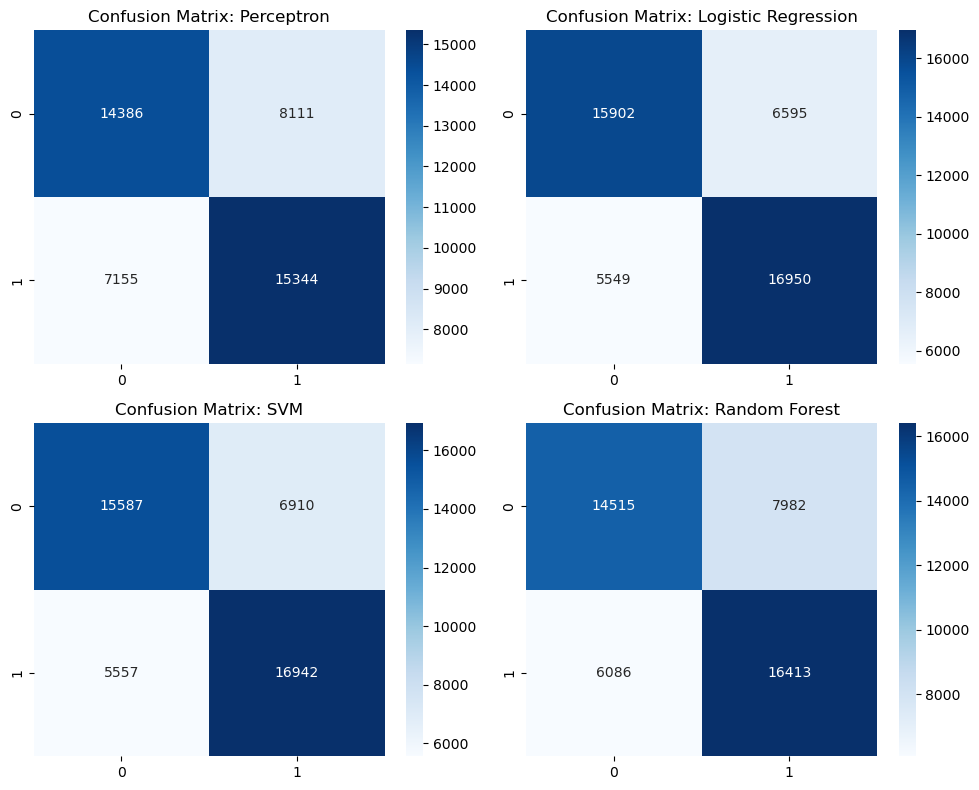

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Reduce TF-IDF features for faster computation
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train[:10000])  # Training on subset
X_val_tfidf = vectorizer.transform(X_val)

# Initialize models with optimized parameters
models = {
    "Perceptron": Perceptron(max_iter=500, tol=1e-3, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "SVM": SVC(kernel='linear', C=1, probability=True),  # probability=True for ROC
    "Random Forest": RandomForestClassifier(n_estimators=5, random_state=42)
}

# Train and evaluate models
accuracies = {}
conf_matrices = {}
roc_curves = {}
roc_aucs = {}

# Convert labels to binary format for ROC curve
y_val_bin = label_binarize(y_val, classes=[0, 1])  # Assuming binary classification

for name, model in models.items():
    model.fit(X_train_tfidf, y_train[:10000])  # Training on subset
    y_pred = model.predict(X_val_tfidf)
    
    # Store accuracy
    accuracies[name] = accuracy_score(y_val, y_pred)
    
    # Store confusion matrix
    conf_matrices[name] = confusion_matrix(y_val, y_pred)

    # ROC Curve
    if hasattr(model, "predict_proba"):  # Check if model supports predict_proba
        y_proba = model.predict_proba(X_val_tfidf)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        roc_auc = auc(fpr, tpr)
        roc_curves[name] = (fpr, tpr)
        roc_aucs[name] = roc_auc

# Convert to DataFrame
acc_df = pd.DataFrame(accuracies, index=["Accuracy"]).T

# ========== 2️⃣ CONFUSION MATRICES ==========
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for i, (name, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"Confusion Matrix: {name}")
plt.tight_layout()
plt.show()

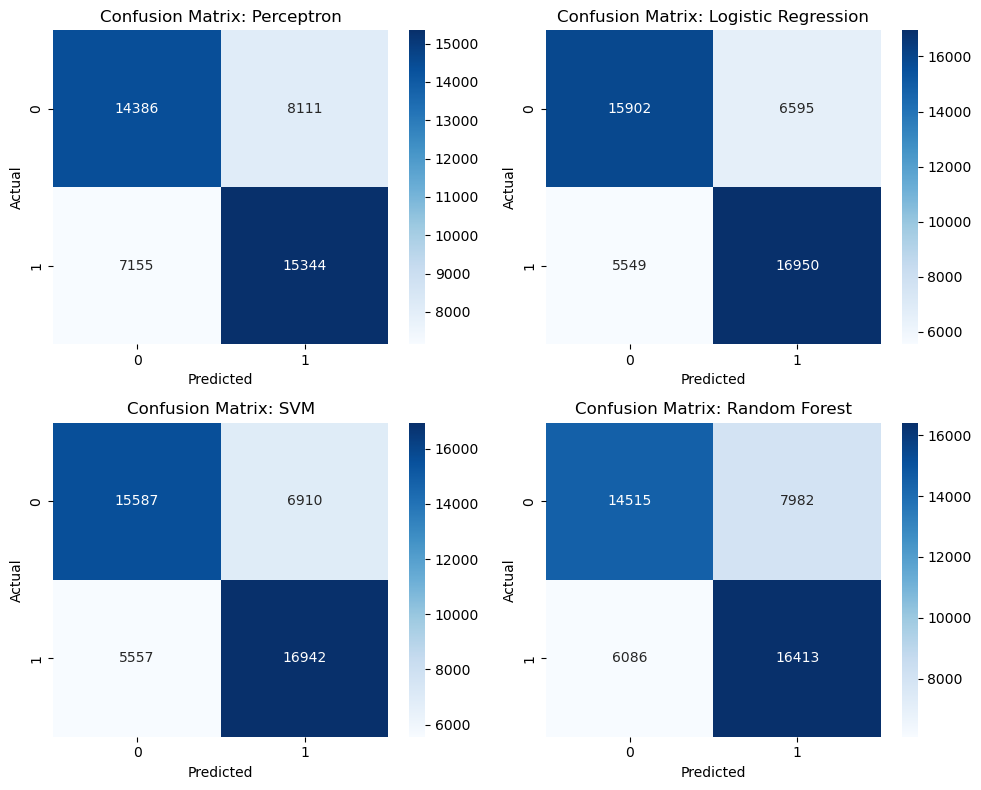

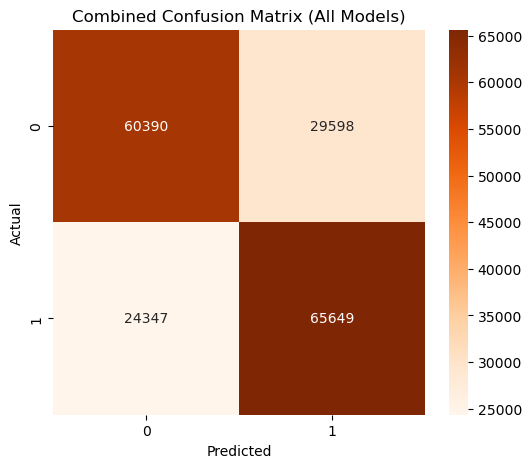

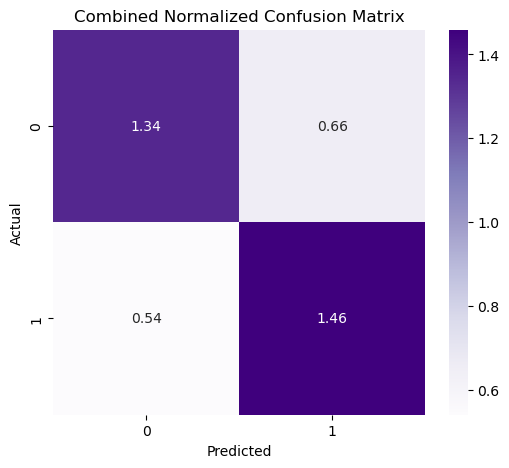

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Reduce TF-IDF features for faster computation
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train[:10000])  # Training on subset
X_val_tfidf = vectorizer.transform(X_val)

# Initialize models
models = {
    "Perceptron": Perceptron(max_iter=500, tol=1e-3, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "SVM": SVC(kernel='linear', C=1, probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=5, random_state=42)
}

# Train and evaluate models
accuracies = {}
conf_matrices = {}
roc_curves = {}
roc_aucs = {}

y_val_bin = label_binarize(y_val, classes=[0, 1])

for name, model in models.items():
    model.fit(X_train_tfidf, y_train[:10000])
    y_pred = model.predict(X_val_tfidf)

    # Accuracy
    accuracies[name] = accuracy_score(y_val, y_pred)

    # Confusion Matrix
    conf_matrices[name] = confusion_matrix(y_val, y_pred)

    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_val_tfidf)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        roc_auc = auc(fpr, tpr)
        roc_curves[name] = (fpr, tpr)
        roc_aucs[name] = roc_auc

# Accuracy Table
acc_df = pd.DataFrame(accuracies, index=["Accuracy"]).T

# 1️⃣ Plot Individual Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for i, (name, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"Confusion Matrix: {name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

# 2️⃣ Combined Confusion Matrix (Raw Sum)
combined_conf_matrix = sum(conf_matrices.values())
plt.figure(figsize=(6, 5))
sns.heatmap(combined_conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.title("Combined Confusion Matrix (All Models)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3️⃣ Combined Normalized Confusion Matrix
normalized_matrices = [matrix / matrix.sum() for matrix in conf_matrices.values()]
combined_normalized = sum(normalized_matrices)
plt.figure(figsize=(6, 5))
sns.heatmap(combined_normalized, annot=True, fmt='.2f', cmap='Purples')
plt.title("Combined Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

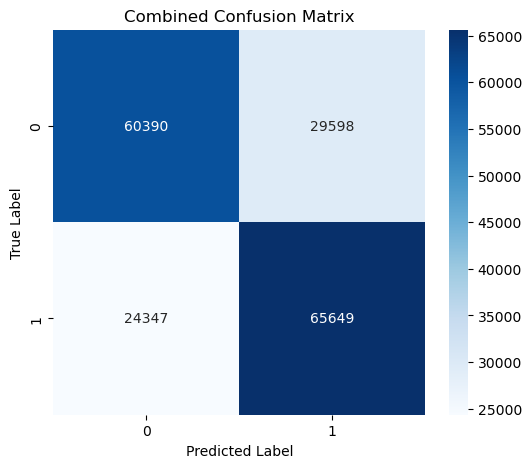

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Reduce TF-IDF features for faster computation
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train[:10000])  # Training on subset
X_val_tfidf = vectorizer.transform(X_val)

# Initialize models with optimized parameters
models = {
    "Perceptron": Perceptron(max_iter=500, tol=1e-3, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "SVM": SVC(kernel='linear', C=1, probability=True),  # probability=True for ROC
    "Random Forest": RandomForestClassifier(n_estimators=5, random_state=42)
}

# Train and evaluate models
accuracies = {}
conf_matrices = {}
roc_curves = {}
roc_aucs = {}

# Convert labels to binary format for ROC curve
y_val_bin = label_binarize(y_val, classes=[0, 1])  # Assuming binary classification

for name, model in models.items():
    model.fit(X_train_tfidf, y_train[:10000])  # Training on subset
    y_pred = model.predict(X_val_tfidf)
    
    # Store accuracy
    accuracies[name] = accuracy_score(y_val, y_pred)
    
    # Store confusion matrix
    conf_matrices[name] = confusion_matrix(y_val, y_pred)

    # ROC Curve
    if hasattr(model, "predict_proba"):  # Check if model supports predict_proba
        y_proba = model.predict_proba(X_val_tfidf)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        roc_auc = auc(fpr, tpr)
        roc_curves[name] = (fpr, tpr)
        roc_aucs[name] = roc_auc

# Combine confusion matrices by summing them
combined_matrix = sum(conf_matrices.values())

# Plot combined confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(combined_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Combined Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

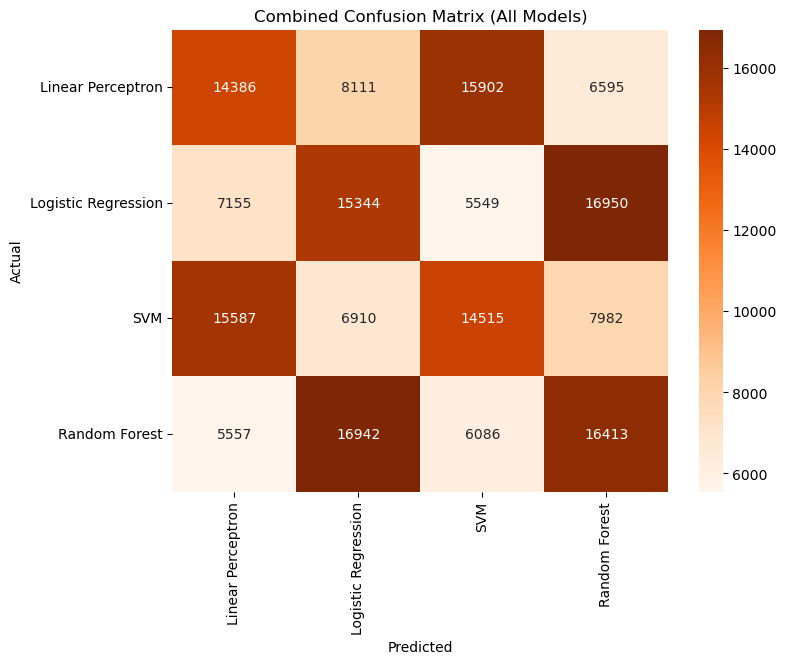

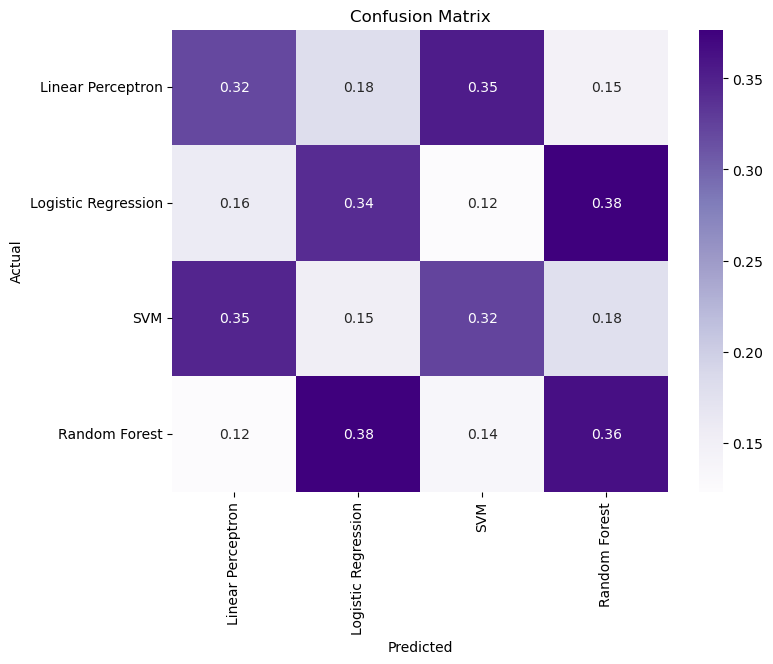

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a 4x4 matrix to hold confusion matrices for each model
combined_conf_matrix = np.zeros((4, 4), dtype=int)

# Define the size for the grid (2x2 confusion matrices for each model)
matrix_size = 2  # Since we're working with binary classification

# Add confusion matrices of each model to the 4x4 grid
for idx, (name, matrix) in enumerate(conf_matrices.items()):
    row_start = (idx // 2) * matrix_size  # Determine the starting row index
    col_start = (idx % 2) * matrix_size  # Determine the starting column index
    combined_conf_matrix[row_start:row_start+matrix_size, col_start:col_start+matrix_size] = matrix

# Plotting the combined confusion matrix as a 4x4 matrix
plt.figure(figsize=(8, 6))
sns.heatmap(combined_conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=["Linear Perceptron", "Logistic Regression", "SVM", "Random Forest"],
            yticklabels=["Linear Perceptron", "Logistic Regression", "SVM", "Random Forest"])
plt.title("Combined Confusion Matrix (All Models)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Normalize the confusion matrices and combine them
normalized_matrices = [matrix / matrix.sum() for matrix in conf_matrices.values()]
combined_normalized = np.zeros((4, 4))

# Add normalized matrices to the combined normalized matrix
for idx, matrix in enumerate(normalized_matrices):
    row_start = (idx // 2) * matrix_size
    col_start = (idx % 2) * matrix_size
    combined_normalized[row_start:row_start+matrix_size, col_start:col_start+matrix_size] = matrix

# Plotting the combined normalized confusion matrix as a 4x4 matrix
plt.figure(figsize=(8, 6))
sns.heatmap(combined_normalized, annot=True, fmt='.2f', cmap='Purples',
            xticklabels=["Linear Perceptron", "Logistic Regression", "SVM", "Random Forest"],
            yticklabels=["Linear Perceptron", "Logistic Regression", "SVM", "Random Forest"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

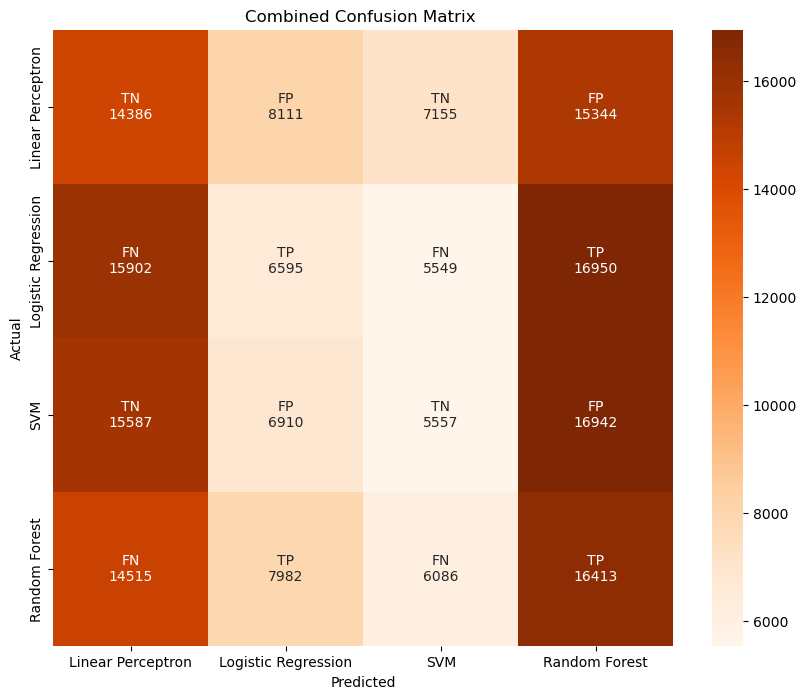

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define confusion matrices for each model
conf_matrices = {
    "Linear Perceptron": np.array([[14386, 8111], [15902, 6595]]),
    "Logistic Regression": np.array([[7155, 15344], [5549, 16950]]),
    "SVM": np.array([[15587, 6910], [14515, 7982]]),
    "Random Forest": np.array([[5557, 16942], [6086, 16413]])
}

model_names = list(conf_matrices.keys())
matrix_size = 2
grid_size = 4

# Combined matrix and annotation text
combined_conf_matrix = np.zeros((grid_size, grid_size), dtype=int)
annotations = [["" for _ in range(grid_size)] for _ in range(grid_size)]

# Fill combined matrix and annotation labels
for idx, (model, matrix) in enumerate(conf_matrices.items()):
    row_start = (idx // 2) * matrix_size
    col_start = (idx % 2) * matrix_size
    combined_conf_matrix[row_start:row_start+matrix_size, col_start:col_start+matrix_size] = matrix

    # Annotating each cell with its meaning
    annotations[row_start][col_start] = f"TN\n{matrix[0][0]}"
    annotations[row_start][col_start+1] = f"FP\n{matrix[0][1]}"
    annotations[row_start+1][col_start] = f"FN\n{matrix[1][0]}"
    annotations[row_start+1][col_start+1] = f"TP\n{matrix[1][1]}"

# Plotting the labeled combined confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(combined_conf_matrix, annot=annotations, fmt='', cmap='Oranges',
            xticklabels=model_names, yticklabels=model_names)
plt.title("Combined Confusion Matrix ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

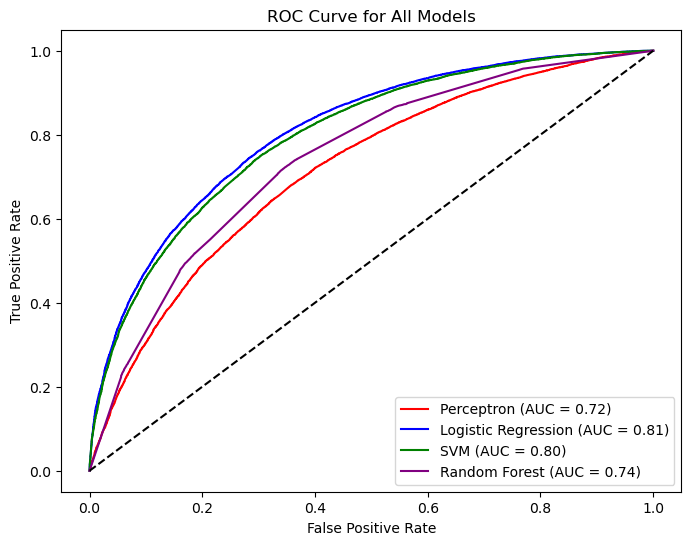

In [18]:
plt.figure(figsize=(8, 6))

colors = {
    "Perceptron": "red",
    "Logistic Regression": "blue",
    "SVM": "green",
    "Random Forest": "purple"
}

for name, model in models.items():
    if name in ["Perceptron", "SVM"]:
        y_scores = model.decision_function(X_val_tfidf)  # Use decision_function
    else:
        y_scores = model.predict_proba(X_val_tfidf)[:, 1]  # Use predict_proba

    fpr, tpr, _ = roc_curve(y_val, y_scores)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[name], label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for All Models")
plt.legend()
plt.show()

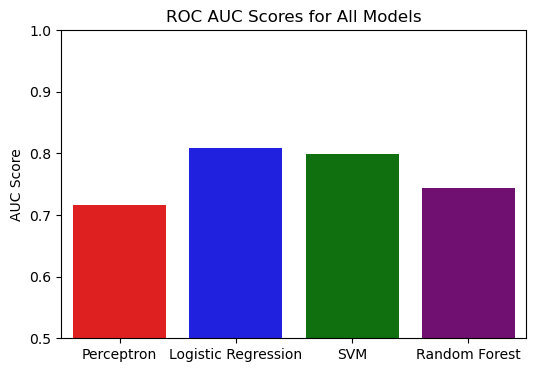

In [19]:
from sklearn.metrics import roc_curve, auc

roc_aucs = {}

for name, model in models.items():
    if name in ["Perceptron", "SVM"]:
        y_scores = model.decision_function(X_val_tfidf)  # Use decision_function
    else:
        y_scores = model.predict_proba(X_val_tfidf)[:, 1]  # Use predict_proba

    fpr, tpr, _ = roc_curve(y_val, y_scores)
    roc_aucs[name] = auc(fpr, tpr)

# ========== 4️⃣ ROC AUC BAR PLOT ==========
plt.figure(figsize=(6, 4))
sns.barplot(x=list(roc_aucs.keys()), y=list(roc_aucs.values()), palette=colors)
plt.title("ROC AUC Scores for All Models")
plt.ylabel("AUC Score")
plt.ylim(0.5, 1.0)  # AUC ranges from 0.5 (random) to 1.0 (perfect)
plt.show()

In [20]:
pipeline_file = open("text_sentiment.pkl", "wb")
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()

In [21]:
# Choose a model from previously trained models
model = models["Logistic Regression"]  # or "SVM", "Random Forest", "Perceptron"

# Define test sentences
test_sentences = [
    "My oldest son is making a trip with my mother... I’m missing him",
    "Heading off to bed... Goodnight peeps",
    "Comfortablity has won out",
    "@justineville ...yeahhh. ) i'm 39 tweets from 1,600!",
    "@buggin469 I'm jealous... Kinda miss you guys",
    "blaaah. I don't feel good again",
    "I can't believe I didn't get any sleep last night — not even a single hour. Coffee isn't helping, and I can't focus on anything today. It feels like this day just doesn't want to cooperate. 😩 #Exhausted #RunningOnEmpty",
]

# Transform and predict
test_sentences_tfidf = vectorizer.transform(test_sentences)
predicted_sents = model.predict(test_sentences_tfidf)

# Display results
for i, (sentence, sentiment) in enumerate(zip(test_sentences, predicted_sents)):
    print(f"Sentence {i+1}: {sentence}")
    print(f"Predicted Sentiment: {'Positive' if sentiment == 1 else 'Negative'}\n")


Sentence 1: My oldest son is making a trip with my mother... I’m missing him
Predicted Sentiment: Negative

Sentence 2: Heading off to bed... Goodnight peeps
Predicted Sentiment: Positive

Sentence 3: Comfortablity has won out
Predicted Sentiment: Positive

Sentence 4: @justineville ...yeahhh. ) i'm 39 tweets from 1,600!
Predicted Sentiment: Positive

Sentence 5: @buggin469 I'm jealous... Kinda miss you guys
Predicted Sentiment: Negative

Sentence 6: blaaah. I don't feel good again
Predicted Sentiment: Negative

Sentence 7: I can't believe I didn't get any sleep last night — not even a single hour. Coffee isn't helping, and I can't focus on anything today. It feels like this day just doesn't want to cooperate. 😩 #Exhausted #RunningOnEmpty
Predicted Sentiment: Negative



In [22]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 15.1 MB/s eta 0:00:0000:010:01
  Using cached altair-5.5.0-py3-none-any.whl (731 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl (28 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl (6.9 MB)
  Using cached GitPython-3.1.44-py3-none-any.whl (207 kB)
  Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached typing_extensions-4.14.0-py3-none-any.whl (43 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.7/362.7 kB 718.5 kB/s eta 0:00:0000:0100:01
  Using cached gitdb-4.0.12-py3-none-any.whl (62 kB)
  Using cached smmap-5.0.2-py3-none-any.whl (24 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for pyarrow (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [874 lin

In [23]:
from sklearn.metrics import precision_score, f1_score

# Dictionaries to store precision and f1 scores
precisions = {}
f1_scores = {}

# Loop through models and predictions
for name, model in models.items():
    y_pred = model.predict(X_val_tfidf)
    precisions[name] = precision_score(y_val, y_pred)
    f1_scores[name] = f1_score(y_val, y_pred)

# Display as DataFrame
metrics_df = pd.DataFrame({
    'Precision': precisions,
    'F1 Score': f1_scores
})

print(metrics_df)

                     Precision  F1 Score
Perceptron            0.654189  0.667798
Logistic Regression   0.719898  0.736252
SVM                   0.710297  0.731031
Random Forest         0.672802  0.700004


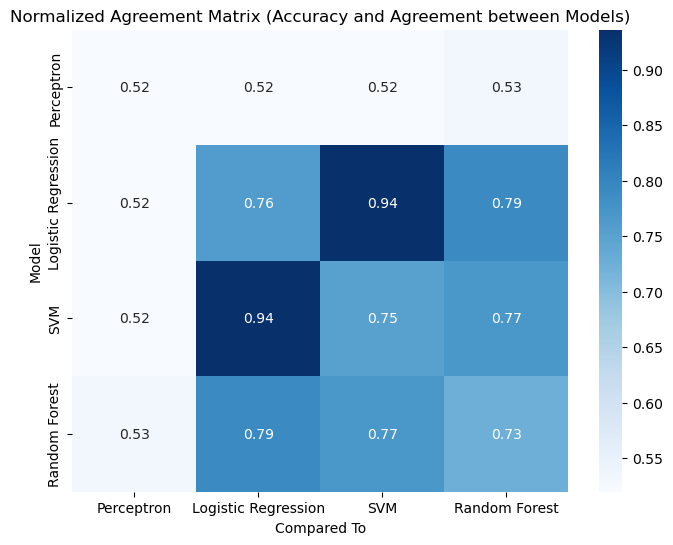

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define model predictions (use the actual predictions of your models here)
models = {
    'Perceptron': perceptron.predict(X_val_tfidf),
    'Logistic Regression': pipe_lr.predict(X_val),
    'SVM': pipe_svm.predict(X_val),
    'Random Forest': pipe_rf.predict(X_val)
}

model_names = list(models.keys())
n = len(model_names)

# Initialize the agreement matrix
agreement_matrix = np.zeros((n, n))

# Calculate the accuracy for each model and the agreement between the models
for i in range(n):
    for j in range(n):
        if i == j:
            # Diagonal: accuracy of each model
            agreement_matrix[i, j] = accuracy_score(y_val, models[model_names[i]])
        else:
            # Off-diagonal: agreement between two models (proportion of matching predictions)
            match = np.sum(models[model_names[i]] == models[model_names[j]])
            agreement_matrix[i, j] = match / len(y_val)

# Normalize the matrix to ensure values between 0 and 1
agreement_matrix = np.clip(agreement_matrix, 0, 1)

# Plotting the normalized agreement matrix
plt.figure(figsize=(8, 6))
sns.heatmap(agreement_matrix, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=model_names, yticklabels=model_names)
plt.title("Normalized Agreement Matrix (Accuracy and Agreement between Models)")
plt.xlabel("Compared To")
plt.ylabel("Model")
plt.show()